In [2]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from konlpy.tag import Hannanum, Okt, Twitter
import pandas as pd

import psycopg2
import json

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 다운로드한 한글 폰트 파일 경로

In [3]:
file_path = "./connections.json"

with open(file_path, 'r') as file:
    con = json.load(file)

# Redshift 연결 정보
host = con['redshift_conn']['host']
dbname = 'dev'
user = con['redshift_conn']['login']
password = con['redshift_conn']['password']
port = '5439'

# 쿼리 작성
query = 'SELECT * FROM "raw_data"."news_article";'

# Redshift에 연결
conn = psycopg2.connect(
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)

In [4]:
# 쿼리 실행 및 결과 가져오기
try:
    cursor = conn.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    for row in rows:
        print(row)
except Exception as e:
    print("Error:", e)
finally:
    if conn:
        conn.close()

('삼성전자', 'https://n.news.naver.com/mnews/article/015/0004881802?sid=101', '[ST기업 CEO 릴레이 인터뷰]③ 조현호 빌리어네어즈 대표토큰증권(ST) 기업 빌리어네어즈는 \'조경 수목\' 토큰증권 발행을 준비하고 있다. 나무를 심고 3~4년 동안 키워서 아파트단지를 조성하는 건설업체 등에 판매한 뒤 이 수익금을 토큰 투자자들에게 배당하는 사업모델이다. 조현호 빌리어네어즈 공동대표(사진)는 "이 방법으로 ST 투자자에게 연 환산 20%대 중반의 수익을 줄 수 있을 것으로 예상된다"고 했다.조 대표의 설명에 따르면 이 ST의  수익 구조는 다음과 같다. 먼저 빌리어네어즈가 나무 농장주에게 토지를 임차한다. 빌리어네어즈가 여기에 지름 3㎝짜리 느티나무, 산딸나무, 왕벚나무 묘목을 심은 뒤 이를 토큰증권(ST)으로 만들어 투자자에게 판매(공모)한다. 이 ST 공모 가격에는 묘목 가격뿐만 아니라 이를 판매할 수 있을 때까지 키우는 비용, 판매하는데 수반되는 비용, 빌리어네어즈가 취하는 수수료 등이 포함된다.빌리어네어즈는 농장을 필지 단위로 농장주에게 임차한다. 한 필지에는 보통 수천 그루의 나무를 심는다. 빌리어네어즈는 투자자들이 \'나무 한 그루=ST 한 개\'라고 느낄 수 있도록 발행 ST의 수를 조절할 계획이다. 예컨대 나무 2000그루가 심겨 있는 농장을 ST로 유동화할 경우 2000개의 ST를 발행하는 식이다.이들 나무는 보통 지름이 12㎝가 되면 건설사 등에 판매된다. 이때까지 키우는데 걸리는 시간은 약 4년이다. 나무가 판매되면 빌리어네어즈는 이를 ST 투자자에게 배당한다. 이 과정을 거쳐 투자자가 받는 배당금을 수익률로 환산하면 연 20%대 중반이라는 게 조 대표의 설명이다.조 대표는 "조경수목은 한 번 심으면 중도에 현금화하기 어렵고, 키우는데 각종 변수도 많기 때문에 농장주가 이를 미리 현금화할 수 있도록 도와주는 게 사업의 핵심"이라며 "나무를 구매하는 측은 건설사뿐만 아니라 정부, 중간상인

In [26]:
csv_test = pd.read_csv('C:/Users/USER/Desktop/데브코스/0Project/4조_최종프로젝트/news_article_삼성전자.csv', escapechar='\\')

In [30]:
combined_string = ' '.join(csv_test['article'])

In [32]:
def get_news_text(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        article_body_element = soup.find('article', id='article-view-content-div')
        if article_body_element:
            article_text = article_body_element.get_text()
            return article_text
    return None

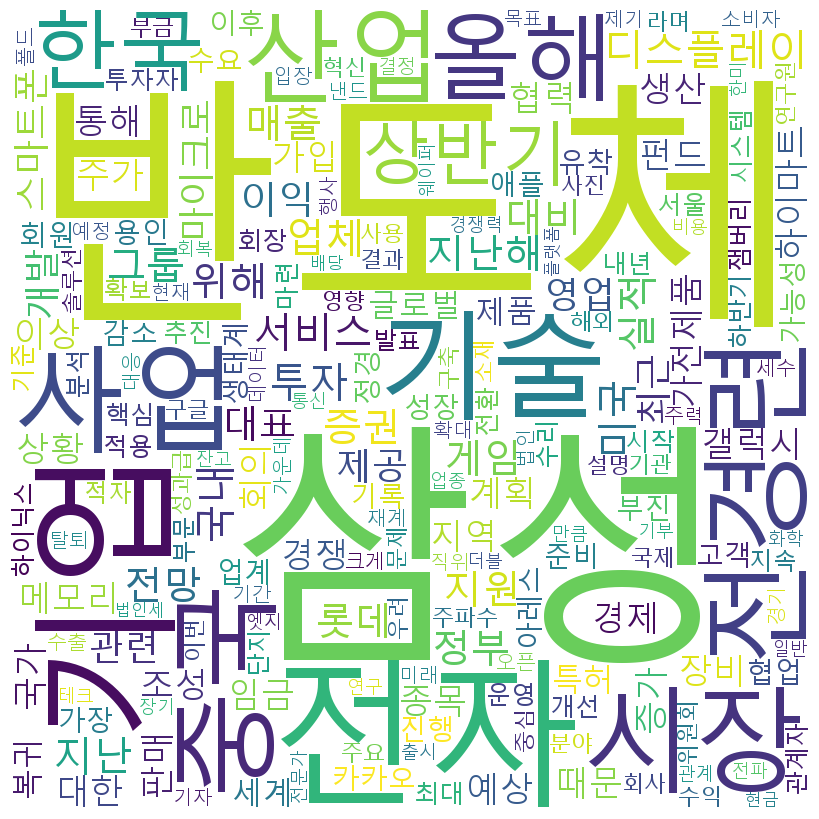

In [60]:
okt = Okt()
nouns = okt.nouns(combined_string)
words = [noun for noun in nouns if len(noun) > 1]
word_counter = dict(sorted(Counter(words).items(), key=lambda x: x[1], reverse=True))



# 폰트 로드
fontprop = fm.FontProperties(fname=font_path, size=12)
 
# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      font_path=font_path,  # 한글 폰트 지정
                      min_font_size=10).generate_from_frequencies(word_counter)
  
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
okt = Okt()
sentences = okt.sentences(combined_string)
sentences

AttributeError: 'Okt' object has no attribute 'sentences'

In [65]:
okt = Okt()
nouns = okt.nouns(combined_string)
words = [noun for noun in nouns if len(noun) > 1]
word_counter = dict(sorted(Counter(words).items(), key=lambda x: x[1], reverse=True)[:35])
word_counter

{'반도체': 212,
 '삼성': 201,
 '전자': 189,
 '기업': 172,
 '기술': 96,
 '사업': 92,
 '시장': 89,
 '전경련': 88,
 '중국': 83,
 '산업': 83,
 '올해': 82,
 '한국': 77,
 '상반기': 71,
 '디스플레이': 70,
 '미국': 67,
 '실적': 66,
 '업체': 65,
 '투자': 64,
 '국내': 64,
 '서비스': 64,
 '지난': 64,
 '그룹': 60,
 '대비': 59,
 '지원': 58,
 '게임': 57,
 '정부': 56,
 '매출': 56,
 '지난해': 56,
 '전망': 56,
 '증권': 55,
 '위해': 54,
 '롯데': 52,
 '대표': 50,
 '이익': 50,
 '제공': 48}

In [49]:
sorted_items = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)
dict(sorted_items[:20])

{'반도체': 158,
 '삼성전자': 128,
 '기업': 92,
 '시장': 79,
 '올해': 79,
 '경련': 79,
 '삼성': 74,
 '기술': 71,
 '상반기': 67,
 '실적': 59,
 '미국': 58,
 '국내': 56,
 '중국': 56,
 '지난해': 55,
 '사업': 52,
 '대비': 49,
 '매출': 48,
 '그룹': 48,
 '지원': 47,
 '산업': 47}

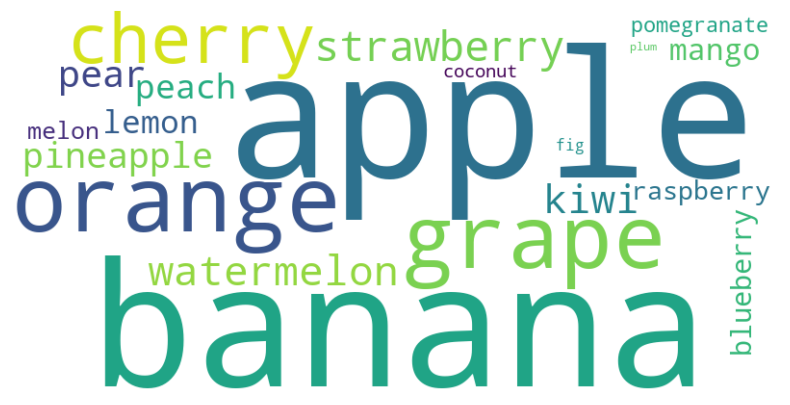

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 등수로 매겨진 단어 리스트 생성 (예시)
ranked_words = [
    "apple", "banana", "orange", "grape", "cherry",
    "strawberry", "watermelon", "kiwi", "pear", "pineapple",
    "peach", "lemon", "mango", "blueberry", "raspberry",
    "melon", "pomegranate", "coconut", "fig", "plum"
]

# 등수별로 단어와 그 등수를 딕셔너리로 매핑
ranked_word_dict = {word: len(ranked_words) - rank + 1 for rank, word in enumerate(ranked_words, start=1)}

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white')

# ranked_word_dict를 사용하여 단어와 등수를 워드클라우드에 표시
wordcloud.generate_from_frequencies(ranked_word_dict)

# 워드클라우드를 이미지로 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
import re
reg = re.compile(r'[a-zA-Z]')

word="asdf한글"
if reg.match(word):
    print("It is an alphabet")
else:
    print("It is not an alphabet")
    
word="asdf한글"
reg = re.compile(r'[a-z]')
if reg.match(word):
    print("It is an alphabet")
else:
    print("It is not an alphabet")

It is an alphabet
It is an alphabet


In [35]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return "Unknown"

# 예시 뉴스 기사
news_article = "안녕하세요 저는 입니다"
detected_language = detect_language(news_article)
if detected_language != "ko":
    continue
print("Detected Language:", detected_language)


Detected Language: ko


In [37]:
import psycopg2
import json
import pandas as pd
from konlpy.tag import Okt, Kkma
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np
import csv
import threading

In [39]:
# 뉴스 키워드 및 3줄 요약 가져오기

# 여기를 바꿔주세요!
news_article_csv_filename = 'news_article_2.csv'
news_keyword_csv_filename = 'news_keyword_2.csv'


df = pd.read_csv(news_article_csv_filename)
rows = df.values.tolist()
kkma = Kkma() 
okt = Okt()
#불용어제거
stopwords = ['머니투데이' , "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자","아", "휴", "아이구", "대한", "이번",
             "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가", "기업", "트진", "위해",
            "지금", "말씀", "지난", "올해"]

tfidf = TfidfVectorizer()
cnt_vec = CountVectorizer()
graph_sentence = []
news_keyword_list = []

def split_sentences(text, start, end, result):
    sentences = kkma.sentences(text[start:end])
    result.extend(sentences)

def text2sentences(text):
    # 스레드 개수 설정
    num_threads = 4
    text_length = len(text)
    chunk_size = text_length // num_threads

    threads = []
    result = []

    # 스레드 생성 및 실행
    for i in range(num_threads):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i != num_threads - 1 else text_length
        thread = threading.Thread(target=split_sentences, args=(text, start, end, result))
        thread.start()
        threads.append(thread)

    # 모든 스레드 종료 대기
    for thread in threads:
        thread.join()

    return result

def get_nouns(corpname, sentences):
    nouns = []
    for sentence in sentences:
        if sentence != '':
            nouns.append(' '.join([noun for noun in okt.nouns(str(sentence))
                                  if noun not in stopwords and noun not in corpname and len(noun) > 1]))
    return nouns

def build_sent_graph(sentence):
    tfidf_mat = tfidf.fit_transform(sentence).toarray()
    graph_sentence = np.dot(tfidf_mat, tfidf_mat.T)
    return graph_sentence

def build_words_graph(sentence):
    cnt_vec_mat = normalize(cnt_vec.fit_transform(sentence).toarray().astype(float), axis=0)
    vocab = cnt_vec.vocabulary_
    return np.dot(cnt_vec_mat.T, cnt_vec_mat), {vocab[word] : word for word in vocab}

def get_ranks(graph, d=0.85): # d = damping factor
    A = graph
    matrix_size = A.shape[0]
    for id in range(matrix_size):
        A[id, id] = 0 # diagonal 부분을 0으로
        link_sum = np.sum(A[:,id]) # A[:, id] = A[:][id]
        if link_sum != 0:
            A[:, id] /= link_sum
        A[:, id] *= -d
        A[id, id] = 1

    B = (1-d) * np.ones((matrix_size, 1))
    ranks = np.linalg.solve(A, B) # 연립방정식 Ax = b
    return {idx: r[0] for idx, r in enumerate(ranks)}

def summarize(sent_num=3):
    summary = []
    index=[]
    for idx in sorted_sent_rank_idx[:sent_num]:
        index.append(idx)

    index.sort()
#     print(index)
    
    for idx in index:
        summary.append(sentences[idx])

    return summary

def keywords(word_num=20):

    keywords = []
    index=[]
    for idx in sorted_word_rank_idx[:word_num]:
        index.append(idx)

    #index.sort()
    for idx in index:
        keywords.append(idx2word[idx])

    return keywords

print("기사 개수 :", len(rows))
a=1
for row in rows:
    corpname = row[0]
    print(a, corpname)
    link = row[1]
    article = row[2]
    sentences = text2sentences(article)
    nouns = get_nouns(corpname, sentences)
    try:
        sent_graph = build_sent_graph(nouns)
    except ValueError:
        print(f"{link} : ValueError", corpname)
        continue
    
    words_graph, idx2word = build_words_graph(nouns)
    sent_rank_idx = get_ranks(sent_graph)  #sent_graph : sentence 가중치 그래프
    sorted_sent_rank_idx = sorted(sent_rank_idx, key=lambda k: sent_rank_idx[k], reverse=True)
    word_rank_idx = get_ranks(words_graph)
    sorted_word_rank_idx = sorted(word_rank_idx, key=lambda k: word_rank_idx[k], reverse=True)
    sum_sentence = summarize()
    sum_keyword = keywords()
    new_row = [corpname, link, sum_keyword, sum_sentence[0], sum_sentence[1], sum_sentence[2]]
    news_keyword_list.append(new_row)
    print("완료 : ", link)
    a+=1
news_keyword_df = pd.DataFrame(news_keyword_list, columns=['corpname', 'link', 'keywords', 'summary_sentence1', 'summary_sentence2', 'summary_sentence3'])
news_keyword_df.to_csv(news_keyword_csv_filename, index=False, encoding='utf-8')

기사 개수 : 48820
1 솔루엠
완료 :  https://www.itooza.com/common/iview.php?no=2023082309442565160
2 솔루엠
완료 :  https://www.itooza.com/common/iview.php?no=2023082308542955250
3 솔루엠
완료 :  https://www.thekpm.com/news/articleView.html?idxno=169807
4 솔루엠


KeyboardInterrupt: 